mnist 데이터를 활용한 Convolutional Neural Network 예제¶
국토연구원 국토데이터랩 | 장요한 (ycanns@krihs.re.kr)
* 아래 샘플은 "한 권으로 다지는 머신러닝 & 딥러닝 with 파이썬 (한빛미디어)"의 예제(p.605 - p.615)와 "혼자 공부하는 머신러닝 + 딥러닝 (한빛미디어)"의 예제(p.444 - p.460)을 수정하여 활용하였습니다
1. INITIALIZATION

In [ ]:
""" 
필요한 함수들을 불러오기: 
keras - 신경망 계산 가속화, 
tensorflow - 벡터행렬 및 미분 계산, 
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기
"""
# 필요한 함수 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential # ANNs model
from tensorflow.keras.layers import Dense, Activation # fully-connected layer with activation function
from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset
from tensorflow.keras import layers, models
from tensorflow import keras

import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# keras에 있는 샘플데이터(mnist) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist에 내제되어 있는 데이터셋의 구성대로 불러오기
# 불러온 minst 데이터가 맞게 들어왔는지 확인
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
# data format 확인하기
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

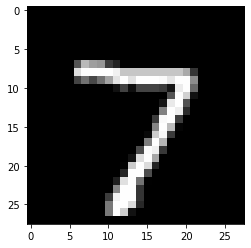

In [ ]:
# data 그림으로 확인하기 
plt.figure()
plt.imshow(x_test[0], cmap='gray')

2. DATA PRE-PROCESSING

In [ ]:
X_train = x_train.reshape(60000, 28 ,28, 1)   # 3차원 배열(샘플수, 가로, 세로)의 4차원 화
X_test = x_test.reshape(10000, 28 ,28, 1)
X_train = X_train.astype('float32')  # 데이터의 정규화를 위한 형식변경
X_test = X_test.astype('float32')
X_train /=255   # 256 색 데이터의 정규화(0~1 사이의 값으로 일반화, Normalization)
X_test /=255
print("X Training matrix shape", X_train.shape) # 변환된 데이터 확인
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 28, 28, 1)
X Testing matrix shape (10000, 28, 28, 1)


In [ ]:
Y_train = to_categorical(y_train, 10) # One-hot Encoding으로 입력값 일반화
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


3. DESIGN CNN ARCHITECTURE

In [ ]:
# 모형 설계하기
# Input(1) - Conv2D(32) - Conv2D(64) - Output(10)
# Try with your own Architecture!

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', # 32개의 필터
                              activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2))   # or try AveragePooling2D >> (14, 14,32)
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # (14, 14,32)
model.add(layers.MaxPooling2D(2)) # >> (7, 7,64)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.4)) # To avoid overfitting
model.add(layers.Dense(10, activation='softmax'))

model.summary()

""" 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
>> feature X(3) x feature Y(3) x depth(1) x filter(32) + bias per filter (32)
 = 320 (# of parameters)
                                                                 
 max_pooling2d_2 (MaxPooling 2D) (None, 14, 14, 32)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
>> feature X(3) x feature Y(3) x depth(32) x filter(64) + bias per filter (64)
 = 18496 (# of parameters)
                                                                 
 max_pooling2d_3 (MaxPooling 2D) (None, 7, 7, 64)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0   
>> feature X(7) x feature Y(7) x depth(1) x filter(64) = 3136
                                                                 
 dense_2 (Dense)             (None, 100)               313700    
>> 3136 (arrays) x neurons (100) + 100 = 313700 -> 100
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
>> 100 -> 100
 dense_3 (Dense)             (None, 10)                1010     
>> 100 (neurons) x neurons (10) + 10 = 1010 
                                                                 
=================================================================
Total params: 333,526
Trainable params: 333,526
Non-trainable params: 0
_________________________________________________________________
"""


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

' \n_________________________________________________________________\n Layer (type)                Output Shape              Param #   \n=================================================================\n conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       \n>> feature X(3) x feature Y(3) x depth(1) x filter(32) + bias per filter (32)\n = 320 (# of parameters)\n                                                                 \n max_pooling2d_2 (MaxPooling 2D) (None, 14, 14, 32)       0         \n                                                                 \n conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     \n>> feature X(3) x feature Y(3) x depth(32) x filter(64) + bias per filter (64)\n = 18496 (# of parameters)\n                                                                 \n max_pooling2d_3 (MaxPooling 2D) (None, 7, 7, 64)         0         \n                                                                 \n flatten_1 (Flatten)         (None, 3136

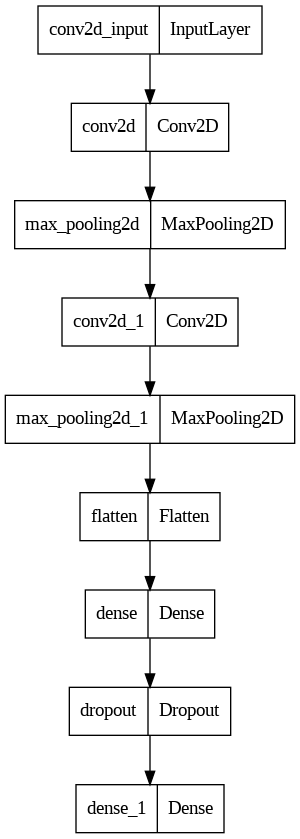

In [ ]:
keras.utils.plot_model(model)

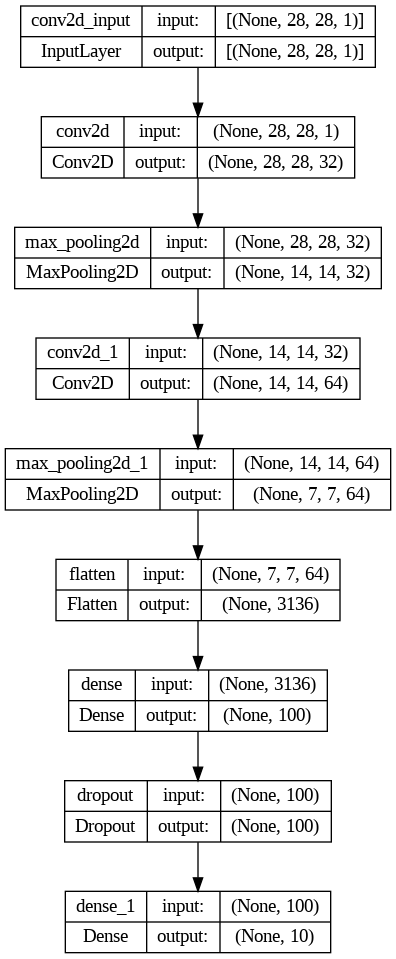

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

4. RUN MODEL

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
start_time = time.time()

hist = model.fit(X_train, y_train, epochs=20, 
                 validation_data=(X_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

print(f'Fit Time :{time.time() - start_time}')

Epoch 1/20
1875/1875 [==============================] - 16s 4ms/step - loss: 0.2046 - accuracy: 0.9380 - val_loss: 0.0434 - val_accuracy: 0.9864
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0728 - accuracy: 0.9780 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9836 - val_loss: 0.0277 - val_accuracy: 0.9912
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0431 - accuracy: 0.9878 - val_loss: 0.0252 - val_accuracy: 0.9919
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0263 - val_accuracy: 0.9907
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0273 - val_accuracy: 0.9915
Fit Time :51.73041749000549


4.1. RESULTS GRAPH

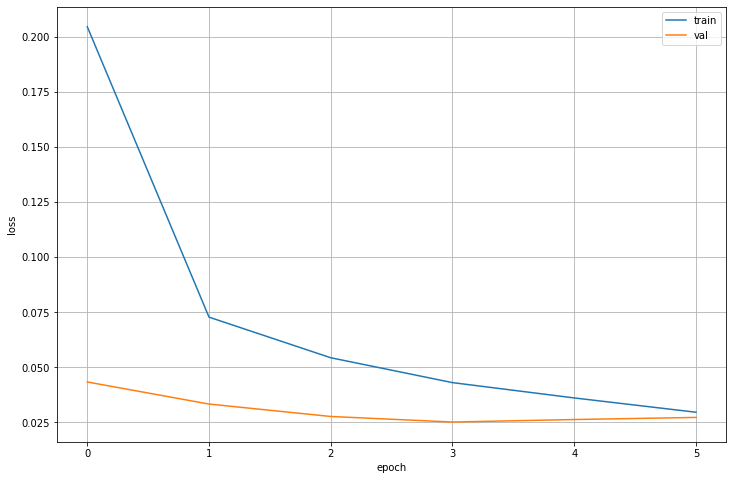

In [ ]:
plot_target = ['loss' , 'val_loss']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

5. CHECK MODEL ACCURACY

In [ ]:
score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0252 - accuracy: 0.9919
Test Loss : 0.025191735476255417
Test Accuracy  : 0.9919000267982483


6. CHECK MODEL RESUTLS

In [ ]:
predicted_result = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_result == y_test)[0] # 잘 예측한 경우
incorrect_indices = np.nonzero(predicted_result != y_test)[0] # 잘 예측하지 못한 경우
print(predicted_result)

313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


7. CHECK PLOT with GOOD RESULTS

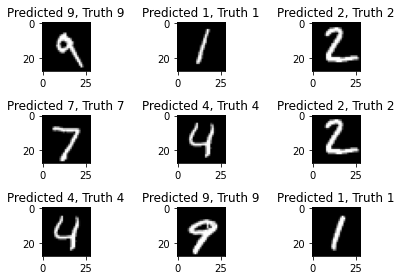

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = predicted_result[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Truth {}".format(predicted_result[correct], y_test[correct]))
  plt.tight_layout()

8. CHECK PLOT with WRONG RESULTS

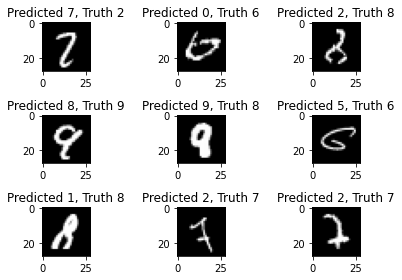

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Truth {}".format(predicted_result[incorrect], y_test[incorrect]))
  plt.tight_layout()

END code